In [71]:
import xarray as xr
import ast
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import pandas as pd
import cartopy.crs as ccrs
from matplotlib.patches import PathPatch
import gsw

In [72]:
with open("eddyCenterpoints_fullYear.txt",'r') as f:
        data = f.read()
        eddyLocation = ast.literal_eval(data)


eddy_df = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')['EddyDetection']
eddy_area = eddy_df.where(eddy_df != 4, other=np.nan)

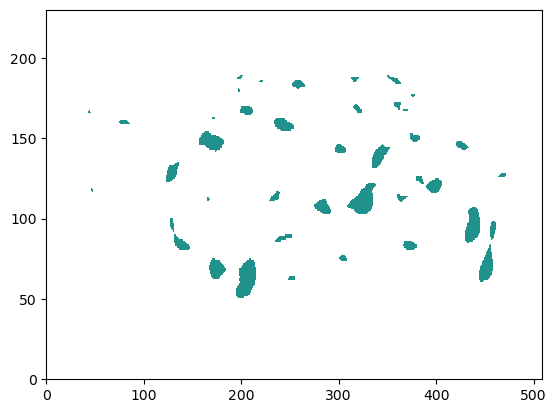

In [73]:
plt.contourf(eddy_area[0],[1.5,2])

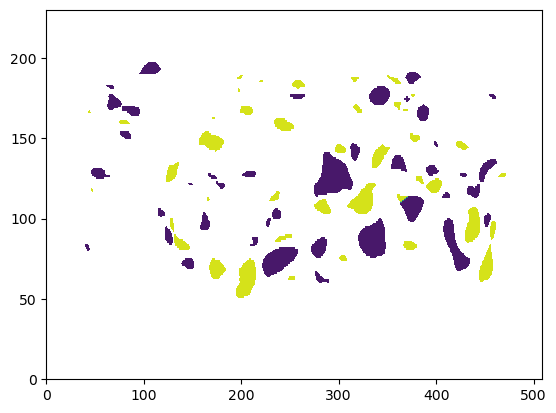

In [74]:
plt.contourf(eddy_area[0])

In [75]:
locMax = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/locMAX2.csv')
locMin = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/locMin2.csv')

depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(71,73.5)).sel(X=slice(-18,-3))
depth_no_nan = depth
depth = depth.where(depth > 0, np.nan)

FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(71,73.5)).sel(X=slice(-18,-3))
FWC = FWC.resample(time='D').mean(dim='time')

In [76]:
x = np.unique([0,2,0,3,np.nan])
x = x[~np.isnan(x)]
print(x[1])

2.0


In [77]:
display(locMax[10:20],locMin)

,Time,ID,Latitude,Longitude
10,0,11,71.826476,-10.867106
11,0,12,72.166988,-13.343243
12,0,13,72.270302,-8.443156
13,0,14,72.291150,-13.738859
14,0,15,72.333038,-12.035385
15,0,16,72.633800,-7.393217
16,0,17,73.430090,-9.916874
17,1,18,71.079446,-8.964616
18,1,19,71.241831,-14.804034
19,1,20,71.407301,-8.921229


,Time,ID,Latitude,Longitude
0,0,3391,71.079446,-10.219283
1,0,3392,71.151252,-12.122169
2,0,3393,71.187372,-13.562805
3,0,3394,71.296632,-7.875797
4,0,3395,71.463188,-15.163024
...,...,...,...,...
7055,364,7634,71.500658,-5.701776
7056,364,7675,71.709923,-7.832029
7057,364,7628,71.924994,-12.818346
7058,364,7648,72.655819,-6.552864


In [78]:
display(locMin.values[0])

array([   0.        , 3391.        ,   71.07944607,  -10.21928261])

In [79]:
display(locMin['ID'].values)

array([3391, 3392, 3393, ..., 7628, 7648, 7676])

In [ ]:
Days = np.zeros(np.max(locMin['ID'].values))
for ID in locMax['ID']:
    Days[ID-1] += 1
for ID in locMin['ID']:
    Days[ID-1] += 1

In [81]:
display(Days)

array([ 0.,  2., 13., ...,  1.,  1.,  1.])

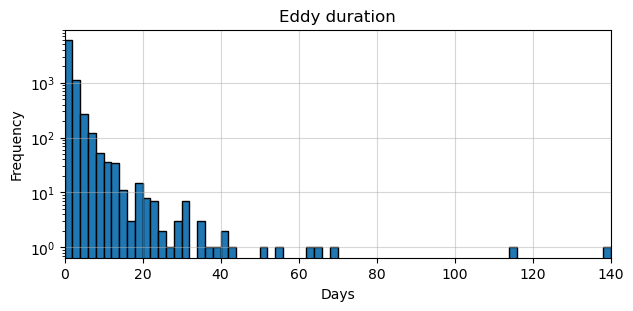

In [82]:
fig, ax = plt.subplots(
    figsize=(6.2217,3),layout='constrained'
)
ax.hist(Days,range=[0,140],bins=70,log=True,edgecolor='black')
ax.grid(alpha=0.5)
ax.set_xlim(0,140)
ax.set_xlabel('Days')
ax.set_ylabel('Frequency')
ax.set_title('Eddy duration')

fig.savefig(f'/nird/home/ekv036/MSc/Fig/EddyDuration',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)

In [88]:
steps = np.arange(np.max(locMin['ID'].values))
Days_pos = [[] for i in steps]
for ID,LAT,LON,TIME in zip(locMax['ID'],locMax['Latitude'],locMax['Longitude'],locMax['Time']):
    Days_pos[ID-1].append([LON,LAT,TIME])
for ID,LAT,LON,TIME in zip(locMin['ID'],locMin['Latitude'],locMin['Longitude'],locMin['Time']):
    Days_pos[ID-1].append([LON,LAT,TIME])

display(Days_pos)

[[[-9.051355615000006, 71.07944607, 0], [-8.964615635000005, 71.09734426, 2]],
 [[-14.804034194999986, 71.24183117499999, 0],
  [-14.759311549999984, 71.24183117499999, 2],
  [-14.759311549999984, 71.27832667499999, 4],
  [-14.491640929999988, 71.24183117499999, 6],
  [-14.536175374999983, 71.24183117499999, 7],
  [-14.536175374999983, 71.22364068499999, 8],
  [-14.536175374999983, 71.26005971999999, 9],
  [-14.491640929999988, 71.24183117499999, 10],
  [-14.491640929999988, 71.26005971999999, 11],
  [-14.669962799999986, 71.24183117499999, 12],
  [-14.759311549999984, 71.24183117499999, 14],
  [-14.580740254999986, 71.24183117499999, 16],
  [-14.536175374999983, 71.24183117499999, 19]],
 [[-10.910303474999994, 71.27832667499999, 0],
  [-10.953504109999994, 71.26005971999999, 2],
  [-11.083126739999994, 71.22364068499999, 3],
  [-11.083126739999994, 71.22364068499999, 4],
  [-11.126342229999992, 71.22364068499999, 5],
  [-11.212786989999993, 71.22364068499999, 6],
  [-11.25601687999999

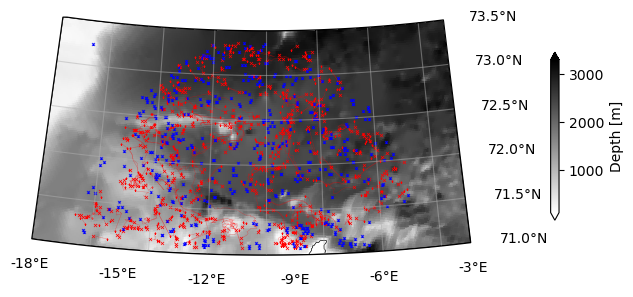

In [94]:
warm = np.max(locMax['ID'].values)
fig, ax = plt.subplots(
    figsize=(6.2217,3), subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-10)}, layout='constrained'
)

extent = [-18+10, -3+10, 71, 73.5]

mesh = ax.pcolormesh(depth.X, depth.Y, depth, cmap='binary', transform=ccrs.PlateCarree())
cbar = fig.colorbar(mesh, shrink=0.6, pad=0.005, extend='both')
cbar.set_label('Depth [m]')
ax.contour(depth_no_nan.XC, depth_no_nan.YC, depth_no_nan, [0], linewidths=0.5, colors='black', transform=ccrs.PlateCarree())

for ID,data in enumerate(Days_pos):
    if FWC[data[0][2]].sel(Y=data[0][1],method='nearest').sel(X=data[0][0],method='nearest') < 0.25:
        continue

    if len(data) < 2:
        continue

    if ID <= warm:
        data_x = []
        data_y = []
        for i,subdata in enumerate(data):
            if i != 0 and subdata[2] <= data[i-1][2]:
                continue
            data_x.append(subdata[0])
            data_y.append(subdata[1])
        ax.plot(data_x,data_y,color='r',linewidth=0.25,alpha=0.5, transform=ccrs.PlateCarree())
        ax.plot(data_x[0],data_y[0],marker='v',color='r',markersize=0.5, transform=ccrs.PlateCarree())
        ax.scatter(data_x[-1],data_y[-1],marker='x',s=5,linewidths=0.5,color='r', transform=ccrs.PlateCarree())
    else:
        data_x = []
        data_y = []
        for i,subdata in enumerate(data):
            if i != 0 and subdata[2] <= data[i][2]:
                continue
            data_x.append(subdata[0])
            data_y.append(subdata[1])
        ax.plot(data_x,data_y,color='b',linewidth=0.25,alpha=0.5, transform=ccrs.PlateCarree())
        ax.plot(data_x[0],data_y[0],marker='v',color='b',markersize=0.5, transform=ccrs.PlateCarree())
        ax.scatter(data_x[-1],data_y[-1],marker='x',s=5,linewidths=0.5,color='b', transform=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

# Add gridlines without labels
gl = ax.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-10, extent[1]-10 + 1, 3)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 0.5, 0.5)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')

fig.savefig(f'/nird/home/ekv036/MSc/Fig/EddyPath',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)